In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('carprediction.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## Exploratory Data Analysis

In [3]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [4]:
df.describe(include='object')

,Make,Model,Engine Fuel Type,Transmission Type,Driven_Wheels,Market Category,Vehicle Size,Vehicle Style
count,11914,11914,11911,11914,11914,8172,11914,11914
unique,48,915,10,5,4,71,3,16
top,Chevrolet,Silverado 1500,regular unleaded,AUTOMATIC,front wheel drive,Crossover,Compact,Sedan
freq,1123,156,7172,8266,4787,1110,4764,3048


Check For Null Values

In [5]:
df.isna().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

There are 5 columns which contain some null value

In [6]:
features_with_na = [feature for feature in df.columns if df[feature].isna().sum()>1]
features_with_na

['Engine Fuel Type',
 'Engine HP',
 'Engine Cylinders',
 'Number of Doors',
 'Market Category']

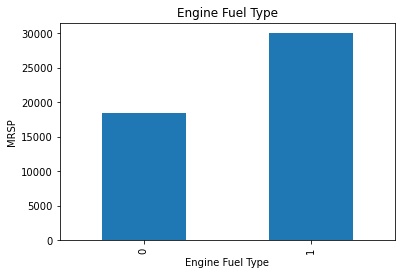

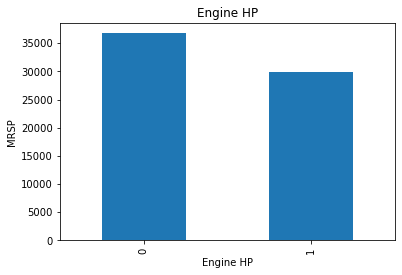

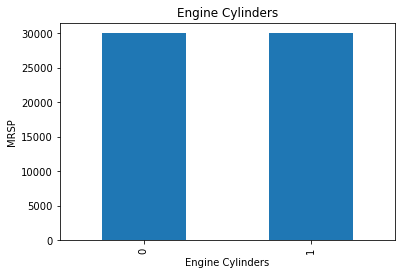

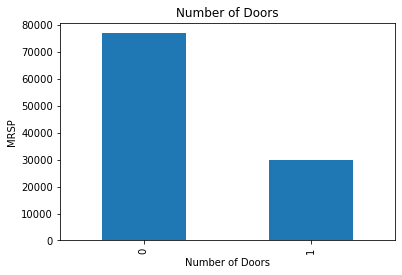

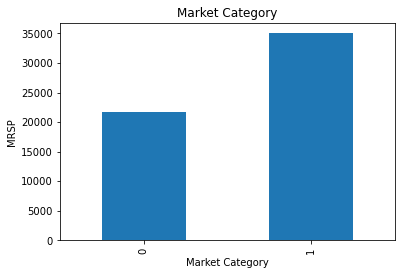

In [7]:
for feature in features_with_na:
    data = df.copy()
    data[feature] = np.where(data[feature].isnull(),0,1)
    data.groupby(feature)['MSRP'].median().plot.bar()
    plt.ylabel('MRSP')
    plt.title(feature)
    plt.show()

In [8]:
num_features = [features for features in df.columns if df[features].dtype!='O']
num_features

['Year',
 'Engine HP',
 'Engine Cylinders',
 'Number of Doors',
 'highway MPG',
 'city mpg',
 'Popularity',
 'MSRP']

In [9]:
df['Year'].unique()

array([2011, 2012, 2013, 1992, 1993, 1994, 2017, 1991, 2016, 1990, 2015,
       1996, 1997, 1998, 2014, 1999, 2002, 2003, 2004, 1995, 2007, 2008,
       2009, 2001, 2010, 2000, 2005, 2006], dtype=int64)

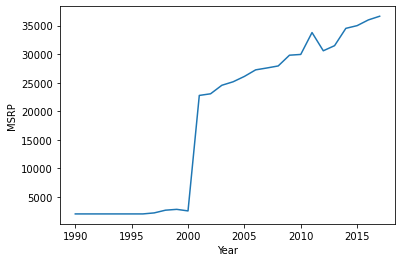

In [10]:
df.groupby('Year')['MSRP'].median().plot()
plt.ylabel('MSRP')
plt.xlabel('Year')
plt.show()

Observation is that Sale Price of Car shows big increase after 2000

In [11]:
obj_features = [feature for feature in df.columns if df[feature].dtype=='O']
obj_features

['Make',
 'Model',
 'Engine Fuel Type',
 'Transmission Type',
 'Driven_Wheels',
 'Market Category',
 'Vehicle Size',
 'Vehicle Style']

In [12]:
df[num_features].head()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
0,2011,335.0,6.0,2.0,26,19,3916,46135
1,2011,300.0,6.0,2.0,28,19,3916,40650
2,2011,300.0,6.0,2.0,28,20,3916,36350
3,2011,230.0,6.0,2.0,28,18,3916,29450
4,2011,230.0,6.0,2.0,28,18,3916,34500


In [13]:
df[obj_features].head()

,Make,Model,Engine Fuel Type,Transmission Type,Driven_Wheels,Market Category,Vehicle Size,Vehicle Style
0,BMW,1 Series M,premium unleaded (required),MANUAL,rear wheel drive,"Factory Tuner,Luxury,High-Performance",Compact,Coupe
1,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,"Luxury,Performance",Compact,Convertible
2,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,"Luxury,High-Performance",Compact,Coupe
3,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,"Luxury,Performance",Compact,Coupe
4,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,Luxury,Compact,Convertible


In [14]:
for feature in obj_features:
    print(feature)
    print(df[feature].unique())
    print("\n")

Make
['BMW' 'Audi' 'FIAT' 'Mercedes-Benz' 'Chrysler' 'Nissan' 'Volvo' 'Mazda'
 'Mitsubishi' 'Ferrari' 'Alfa Romeo' 'Toyota' 'McLaren' 'Maybach'
 'Pontiac' 'Porsche' 'Saab' 'GMC' 'Hyundai' 'Plymouth' 'Honda'
 'Oldsmobile' 'Suzuki' 'Ford' 'Cadillac' 'Kia' 'Bentley' 'Chevrolet'
 'Dodge' 'Lamborghini' 'Lincoln' 'Subaru' 'Volkswagen' 'Spyker' 'Buick'
 'Acura' 'Rolls-Royce' 'Maserati' 'Lexus' 'Aston Martin' 'Land Rover'
 'Lotus' 'Infiniti' 'Scion' 'Genesis' 'HUMMER' 'Tesla' 'Bugatti']


Model
['1 Series M' '1 Series' '100' '124 Spider' '190-Class' '2 Series' '200'
 '200SX' '240SX' '240' '2' '3 Series Gran Turismo' '3 Series' '300-Class'
 '3000GT' '300' '300M' '300ZX' '323' '350-Class' '350Z' '360' '370Z' '3'
 '4 Series Gran Coupe' '4 Series' '400-Class' '420-Class' '456M'
 '458 Italia' '4C' '4Runner' '5 Series Gran Turismo' '5 Series'
 '500-Class' '500e' '500' '500L' '500X' '550' '560-Class' '570S' '575M'
 '57' '599' '5' '6 Series Gran Coupe' '6 Series' '600-Class' '6000'
 '612 Scaglietti' '

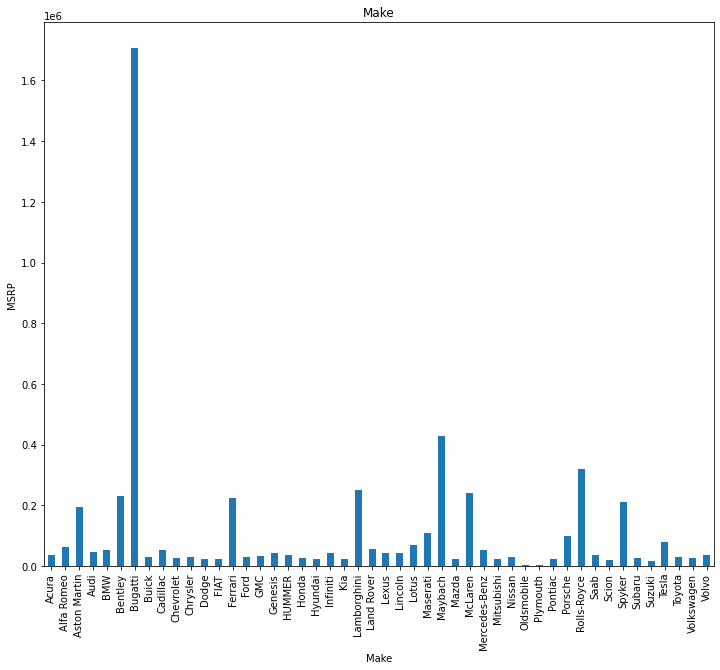

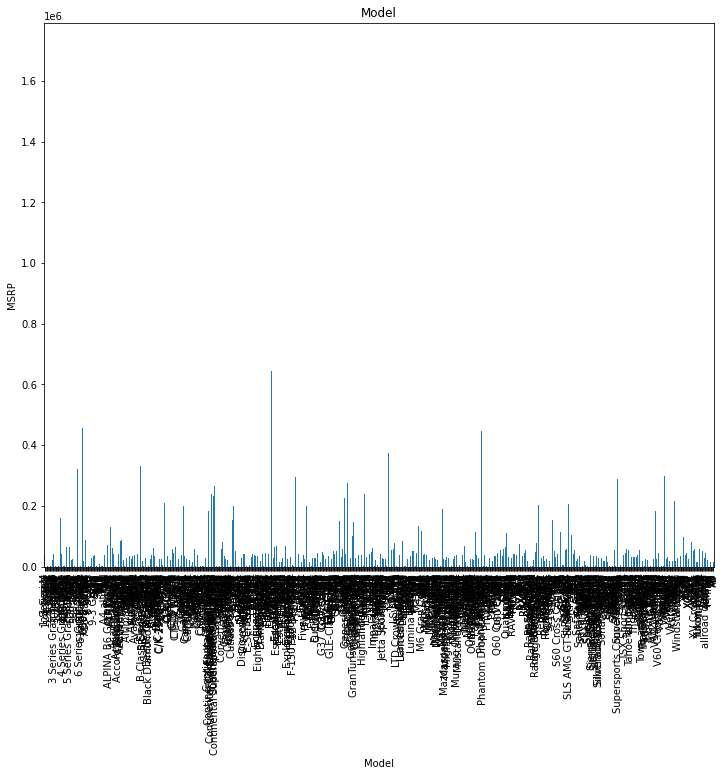

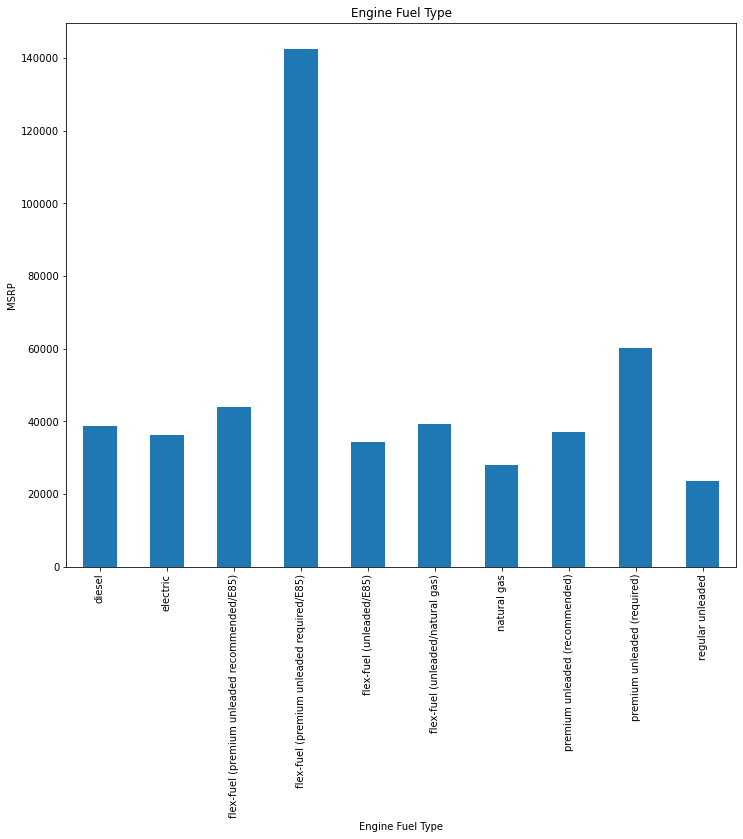

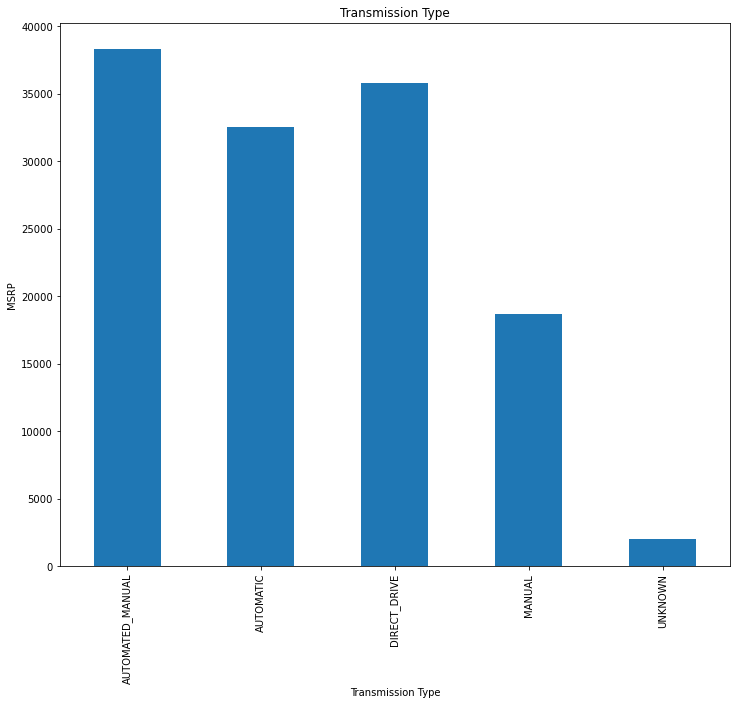

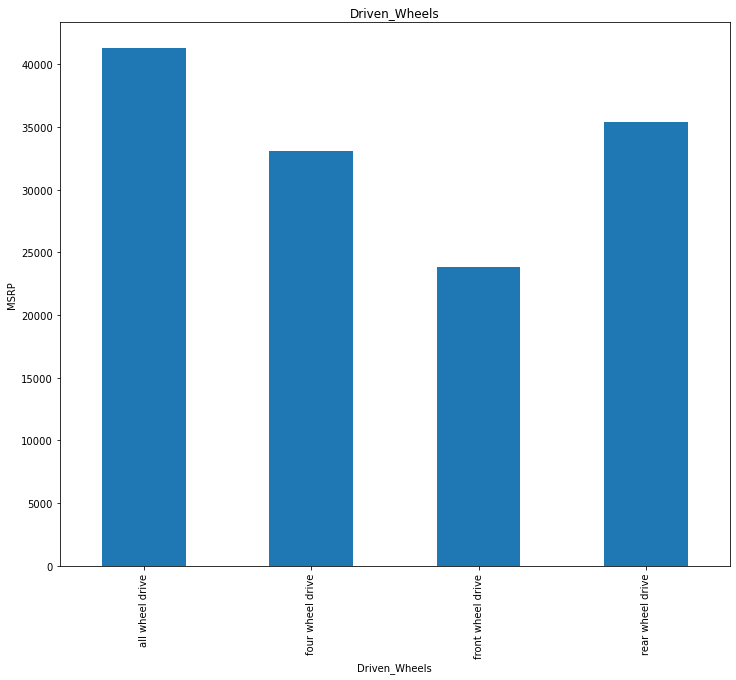

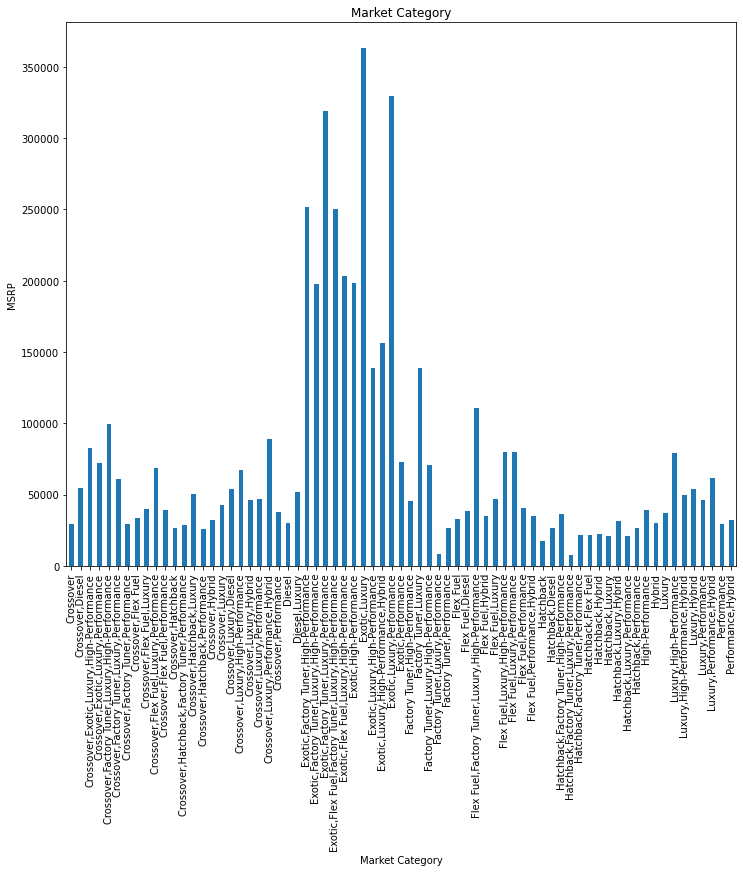

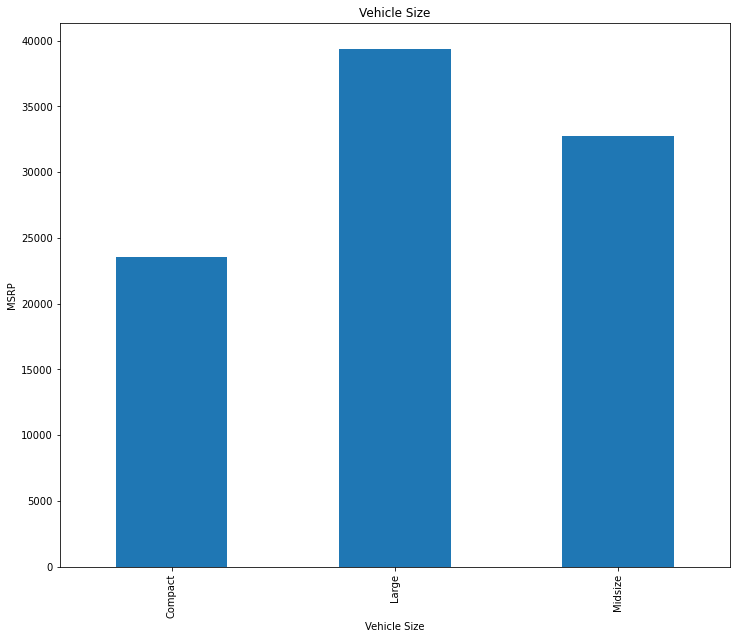

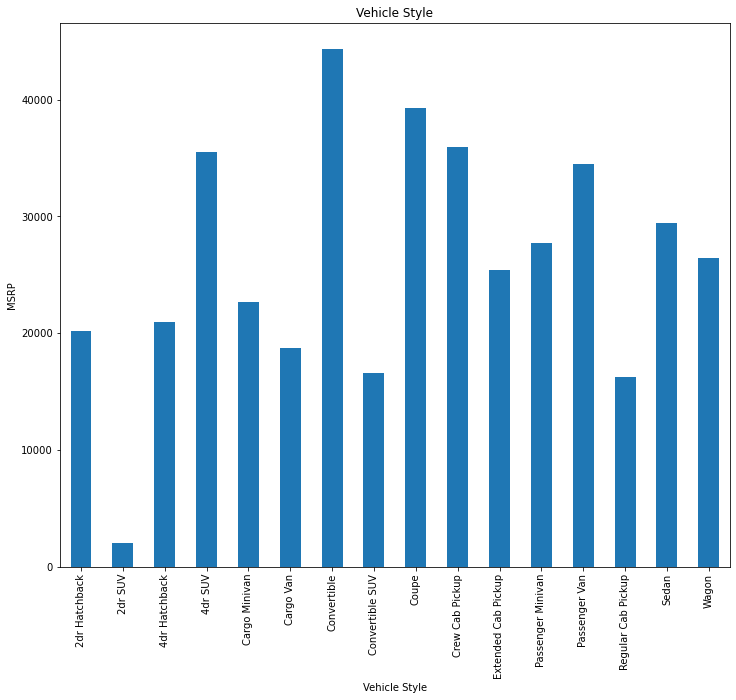

In [15]:
for feature in obj_features:
    data = df.copy()
    data.groupby(feature)['MSRP'].median().plot.bar(figsize=(12,10))
    plt.xlabel(feature)
    plt.ylabel('MSRP')
    plt.title(feature)
    plt.show()

Observation is that Model has lot of unique values

In [16]:
discrete_feature = [feature for feature in num_features if len(df[feature].unique())<45 and feature!='Year']
discrete_feature

['Engine Cylinders', 'Number of Doors']

In [17]:
df[discrete_feature].head()

,Engine Cylinders,Number of Doors
0,6.0,2.0
1,6.0,2.0
2,6.0,2.0
3,6.0,2.0
4,6.0,2.0


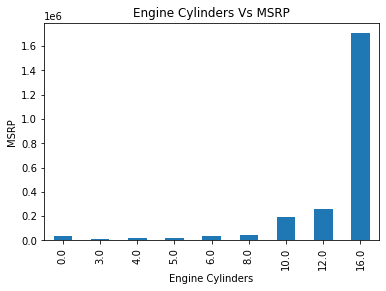

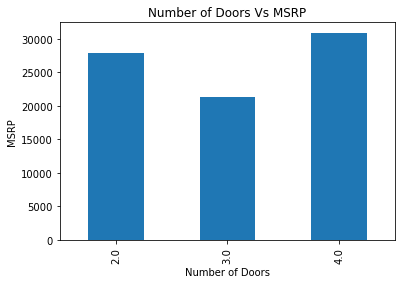

In [18]:
for feature in discrete_feature:
    data = df.copy()
    data.groupby(feature)['MSRP'].median().plot.bar()
    plt.ylabel('MSRP')
    plt.xlabel(feature)
    plt.title(f'{feature} Vs MSRP')
    plt.show()

In [19]:
cont_features = [feature for feature in num_features if feature not in discrete_feature]
cont_features

['Year', 'Engine HP', 'highway MPG', 'city mpg', 'Popularity', 'MSRP']

In [20]:
df[cont_features].head()

,Year,Engine HP,highway MPG,city mpg,Popularity,MSRP
0,2011,335.0,26,19,3916,46135
1,2011,300.0,28,19,3916,40650
2,2011,300.0,28,20,3916,36350
3,2011,230.0,28,18,3916,29450
4,2011,230.0,28,18,3916,34500


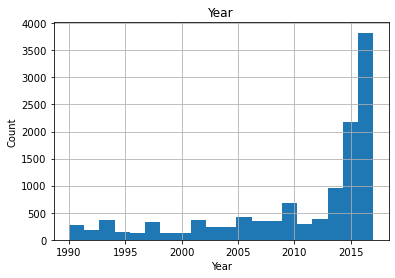

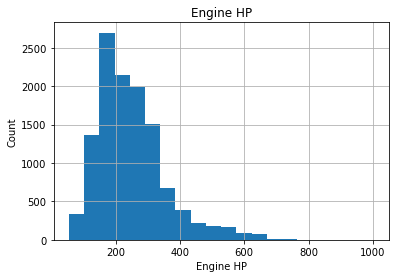

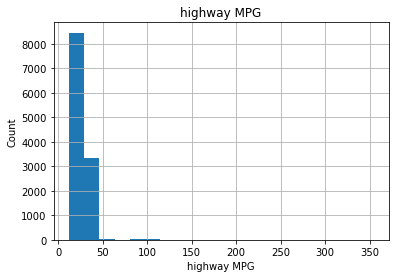

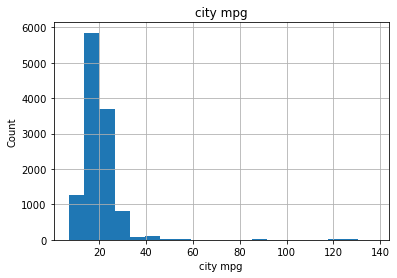

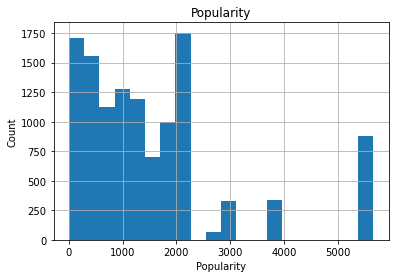

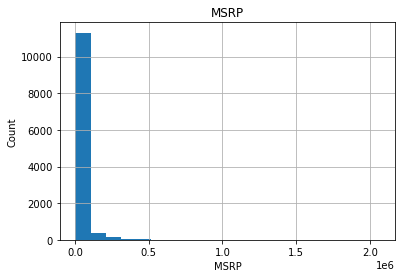

In [21]:
for feature in cont_features:
    data = df.copy()
    data[feature].hist(bins=20)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

## Feature Engineering

Label Encoding the Object Features

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for feature in obj_features:
    df[feature] = le.fit_transform(df[feature])
df[obj_features].head()

,Make,Model,Engine Fuel Type,Transmission Type,Driven_Wheels,Market Category,Vehicle Size,Vehicle Style
0,4,1,8,3,3,38,0,8
1,4,0,8,3,3,67,0,6
2,4,0,8,3,3,64,0,8
3,4,0,8,3,3,67,0,8
4,4,0,8,3,3,63,0,6


In [23]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
y.shape

(11914,)

In [140]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.15)

In [141]:
print(features_with_na)

['Engine Fuel Type', 'Engine HP', 'Engine Cylinders', 'Number of Doors', 'Market Category']


In [142]:
df[features_with_na].isna().sum()

Engine Fuel Type     0
Engine HP           69
Engine Cylinders    30
Number of Doors      6
Market Category      0
dtype: int64

In [143]:
x_train[features_with_na].isna().sum()

Engine Fuel Type     0
Engine HP           62
Engine Cylinders    26
Number of Doors      5
Market Category      0
dtype: int64

In [144]:
na_with_cat = [feature for feature in features_with_na if df[feature].dtype=='O']
na_with_cat.append('Popularity')

In [145]:
na_with_cat

['Popularity']

In [146]:
def replace_cat_feature(data, feature):
    d = data.copy()
    d[feature]=d[feature].fillna('Missing')
    return d
x_train = replace_cat_feature(x_train,na_with_cat)
x_train[na_with_cat].isnull().sum()

Popularity    0
dtype: int64

In [147]:
x_test = replace_cat_feature(x_test,na_with_cat)
x_test[na_with_cat].isnull().sum()

Popularity    0
dtype: int64

In [148]:
na_with_num = [feature for feature in features_with_na if feature not in na_with_cat]
na_with_num

['Engine Fuel Type',
 'Engine HP',
 'Engine Cylinders',
 'Number of Doors',
 'Market Category']

In [149]:
for feature in na_with_num:
    # x_train[feature+'nan'] = np.where(x_train[feature].isnull(),1,0)
    x_train[feature].fillna(x_train[feature].median(),inplace=True)
x_train[na_with_num].isna().sum()

Engine Fuel Type    0
Engine HP           0
Engine Cylinders    0
Number of Doors     0
Market Category     0
dtype: int64

In [150]:
for feature in na_with_num:
    # x_train[feature+'nan'] = np.where(x_train[feature].isnull(),1,0)
    x_test[feature].fillna(x_test[feature].median(),inplace=True)
x_test[na_with_num].isna().sum()

Engine Fuel Type    0
Engine HP           0
Engine Cylinders    0
Number of Doors     0
Market Category     0
dtype: int64

In [151]:
x_train.isna().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
dtype: int64

In [152]:
x_test.isna().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
dtype: int64

In [153]:
x_train.head(25)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity
10553,10,816,2014,4,283.0,6.0,1,2,4.0,41,2,11,25,17,1013
699,28,52,2011,8,543.0,12.0,1,3,4.0,31,1,14,16,10,67
1402,33,111,2015,9,182.0,4.0,1,2,4.0,71,2,14,38,27,2009
3854,19,297,2012,9,138.0,4.0,3,2,4.0,50,0,2,31,23,1439
4186,14,320,2010,9,177.0,4.0,1,0,4.0,15,0,3,27,30,5657
10417,46,809,2016,7,200.0,4.0,1,0,4.0,0,0,3,26,20,873
6695,25,539,2007,9,300.0,8.0,1,3,4.0,63,1,9,16,12,61
9132,45,740,2017,9,381.0,8.0,1,1,4.0,71,1,3,17,13,2031
179,31,15,1992,9,177.0,6.0,1,3,4.0,63,2,15,20,15,617
10588,9,817,2003,9,127.0,4.0,3,1,4.0,71,0,3,23,20,1385


In [154]:
cont_features.remove('MSRP')

ValueError: list.remove(x): x not in list

Normalizing Continous Features

In [155]:
for feature in cont_features:
    if 0 in x_train[feature].unique():
        pass
    else:
        x_train[feature] = np.log(x_train[feature])

In [156]:
x_train.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity
10553,10,816,7.607878,4,5.645447,6.0,1,2,4.0,41,2,11,3.218876,2.833213,6.920672
699,28,52,7.606387,8,6.297109,12.0,1,3,4.0,31,1,14,2.772589,2.302585,4.204693
1402,33,111,7.608374,9,5.204007,4.0,1,2,4.0,71,2,14,3.637586,3.295837,7.605392
3854,19,297,7.606885,9,4.927254,4.0,3,2,4.0,50,0,2,3.433987,3.135494,7.271704
4186,14,320,7.605890,9,5.176150,4.0,1,0,4.0,15,0,3,3.295837,3.401197,8.640649


In [157]:
for feature in cont_features:
    if 0 in x_test[feature].unique():
        pass
    else:
        x_test[feature] = np.log(x_test[feature])

In [158]:
x_test.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity
9747,19,762,7.609367,9,5.181784,4.0,0,2,4.0,71,2,14,3.583519,3.332205,7.271704
11072,9,832,7.603898,9,5.303305,6.0,1,2,4.0,71,2,11,3.135494,2.772589,7.233455
3723,14,278,7.606885,4,5.416100,8.0,1,3,3.0,41,1,5,2.833213,2.564949,8.640649
8875,3,699,7.608871,8,5.808142,6.0,0,0,2.0,39,2,6,3.258097,2.890372,8.040769
6846,25,518,7.608871,9,5.480639,4.0,1,2,4.0,16,0,3,3.367296,2.995732,4.110874


## Data Modelling

In [159]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

In [160]:
lr = LinearRegression()
gbr = GradientBoostingRegressor()

In [161]:
lr.fit(x_train,y_train)
gbr.fit(x_train,y_train)

GradientBoostingRegressor()

In [162]:
x_test.shape

(1788, 15)

In [164]:
print(f"Gradient Boosting Score on Test Dataset is {gbr.score(x_test,y_test)}")
print(f"Gradient Boosting Score on Train Dataset is {gbr.score(x_train,y_train)}")

Gradient Boosting Score is 0.9478148331025419
Gradient Boosting Score is 0.9635461893292391


<img src='image.png'>

In [165]:
import pickle
pickle.dump(gbr,open("car_price_predictor.pkl",'wb'))

## Trying Out Neural Network (Just For Learning)

In [ ]:
import tensorflow as tf

In [ ]:
x_train.shape

(10126, 15)

In [130]:
model = tf.keras.Sequential([
      tf.keras.layers.Dense(150,activation="relu"), # 150 units
      tf.keras.layers.Dense(100,activation="relu"), # 100 units
      tf.keras.layers.Dense(20,activation="relu"), # 20 units
      tf.keras.layers.Dense(1,activation="relu")
])

In [131]:
# model.compile(optimizer=tf.keras.optimizers.SGD(),loss='mse',metrics=["mape"])
model.compile(optimizer="adam",loss='mae',metrics=["mae"])

In [132]:
model.fit(x_train,y_train,epochs=100)

Epoch 1/100
298/298 [==============================] - 1s 882us/step - loss: 29220.0820 - mae: 29220.0820
Epoch 2/100
298/298 [==============================] - 0s 879us/step - loss: 24817.1523 - mae: 24817.1523
Epoch 3/100
298/298 [==============================] - 0s 882us/step - loss: 23341.5137 - mae: 23341.5137
Epoch 4/100
298/298 [==============================] - 0s 1ms/step - loss: 21721.5840 - mae: 21721.5840
Epoch 5/100
298/298 [==============================] - 0s 882us/step - loss: 20979.3594 - mae: 20979.3594
Epoch 6/100
298/298 [==============================] - 0s 879us/step - loss: 20438.7695 - mae: 20438.7695
Epoch 7/100
298/298 [==============================] - 0s 832us/step - loss: 19926.6484 - mae: 19926.6484
Epoch 8/100
298/298 [==============================] - 0s 822us/step - loss: 19491.9785 - mae: 19491.9785
Epoch 9/100
298/298 [==============================] - 0s 832us/step - loss: 19130.3613 - mae: 19130.3613
Epoch 10/100
298/298 [==========================

In [133]:
model_loss, model_mae = model.evaluate(x_test, y_test)

75/75 [==============================] - 0s 716us/step - loss: 10273.6660 - mae: 10273.6660


In [135]:
# loaded_h5_model = tf.keras.models.load_model("model")
# loaded_h5_model.summary()
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 150)               2400      
                                                                 
 dense_47 (Dense)            (None, 100)               15100     
                                                                 
 dense_48 (Dense)            (None, 20)                2020      
                                                                 
 dense_49 (Dense)            (None, 1)                 21        
                                                                 
Total params: 19,541
Trainable params: 19,541
Non-trainable params: 0
_________________________________________________________________
